# Clustering and the k-means Algorithm

**Clustering:** grouping "similar" objects into sets (clusters)

## Toy Example

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

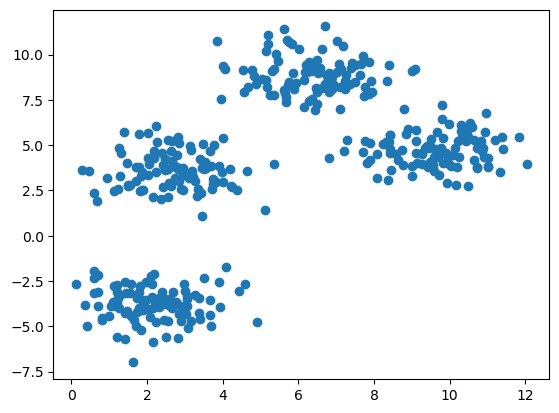

In [3]:
# dataset with 4 clusters
X,y = make_blobs(n_samples = 400, centers = 4, cluster_std = 1)
plt.scatter(X[:,0],X[:,1])

In [4]:
# k-means 
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [6]:
# cluster laels 
labels = kmeans.labels_ 
# cluster centers 
centers = kmeans.cluster_centers_ 

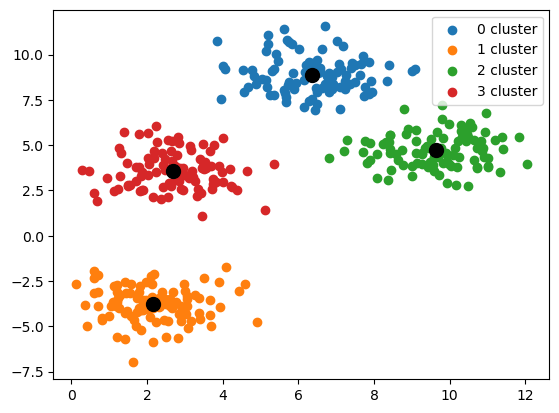

In [7]:
# plot clusters 
for i in range(4): 
    plt.scatter(X[labels==i,0],X[labels==i,1],label=str(i)+' cluster')
    plt.scatter(centers[i,0],centers[i,1],c='k',s=100)
    plt.legend()

In [8]:
new_points = np.array([
    [-10,-4],
    [-5,-10],
    [5,-6]
])

## Choosing the number of clusters

- intertia 
    - $\frac{1}{\text{m}}\sum_{i=1}^{k}\sum_{x\in C_i}(\text{distance(x,m}_i))^2$
    - sum over the number of clusters and sum over the points in the cluster
    - m = number of points 
    - k = number of clusters
- silhouette score 
- silhouette diagram 

In [9]:
def plot_decision_regions(model,X):
    
    # extract feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
    except:
        print('something went wrong...')
        
    # create a mesh grid
    h = .01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #  assign grid points to clusters
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot Voronoi regions
    plt.contourf(Z, extent=(x_min,x_max,y_min,y_max),cmap='Pastel2_r')
    plt.contour(Z, extent=(x_min,x_max,y_min,y_max),linewidths=1,colors='k')
    
    # plot data
    plt.scatter(X[:,0],X[:,1],color='k',s=15)

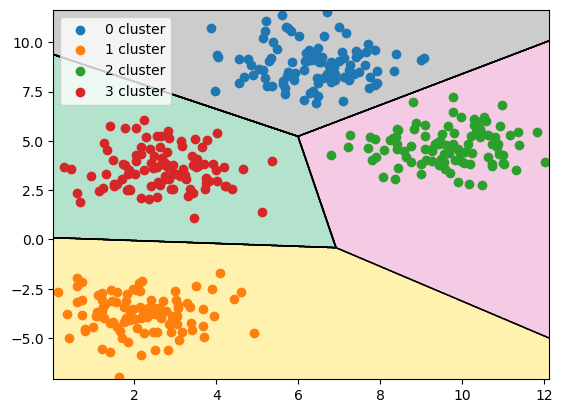

In [12]:
plot_decision_regions(kmeans,X)
for i in range(4): 
    plt.scatter(X[labels==i,0],X[labels==i,1],label=str(i)+' cluster')
    plt.legend()

In [15]:
kmeans.inertia_

800.6568532193182

In [16]:
inertias = []
for k in range(1,20): 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


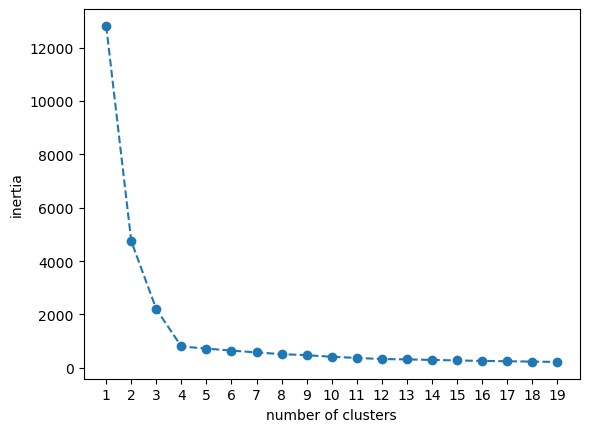

In [18]:
plt.plot(range(1,20),inertias,'o--')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(range(1,20))
plt.show()

- the "elbow" (in the graph above, k = 4) is the best number. In practice, there's not usually a defined elbow

### Silhouette Coefficient

- for each point x, size of cluster = number of points 
- a = $\frac{1}{\text{size of cluster C}_i-1}\sum_{y\in C_i}^{y\neq x}(\text{distance(x,y)})^2$
    - how close is a point x to the other other points in it's cluster 
    - want a small a
- b = $\frac{1}{\text{size of cluster j}}\sum_{y\in C_j}(\text{distance(x,y)})^2$
    - cluster j is cluster closest to x
    - how close is the point x to the next closest cluster 
    - want a large b
    
**Silhouette Coefficient**
- s = $\frac{\text{b-a}}{\text{max{a,b}}} \in [-1,1]$
- s close to 1 means the point is close enough to x to be in the cluster 
- s close to -1 means the point is in another cluster 
- s = 0 is a point between two clusters

**Silhouette Score** 
- mean silhouette coefficient 

In [19]:
from sklearn.metrics import silhouette_score

In [25]:
sil_scores = []
for k in range(2,10): 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sil_scores.append(silhouette_score(X,kmeans.labels_))

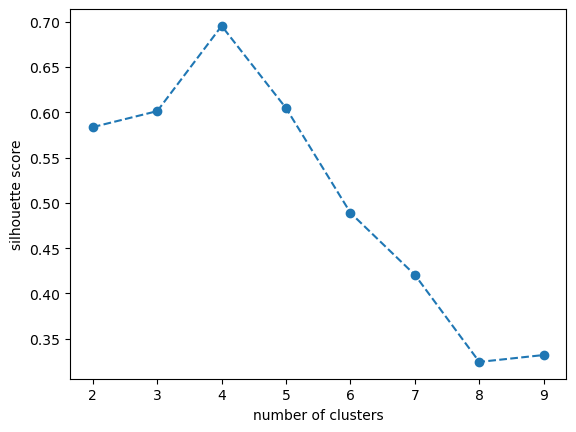

In [26]:
plt.plot(range(2,10),sil_scores,'o--')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.xticks(range(2,10))
plt.show()

### Silhouette Diagram 
- x axis is the silhouette coeff, y axis is each point 
- dotted red line is the silhouette score (mean of the coefficients)

In [31]:
def plot_silhouette_diagram(model,X):
    from sklearn.metrics import silhouette_samples
    from matplotlib.ticker import FixedLocator, FixedFormatter
    from matplotlib import cm
    
    # get cluster labels, cluster centers, number of clusters, and silhouete scores
    labels = model.labels_
    centers = model.cluster_centers_
    k = len(np.unique(labels))
    silhouette_coefficients = silhouette_samples(X,labels)
    
    # plot silhouette diagrams
    plt.figure(figsize=(10,5))
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[labels == i]
        coeffs.sort()
        color = cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos,pos+len(coeffs)),0,coeffs,facecolor=color,edgecolor=color,alpha=0.7)
        
        ticks.append(pos + len(coeffs)//2)
        pos += len(coeffs) + padding
    
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    
    plt.axvline(x=silhouette_score(X,labels),color='red',linestyle='--')

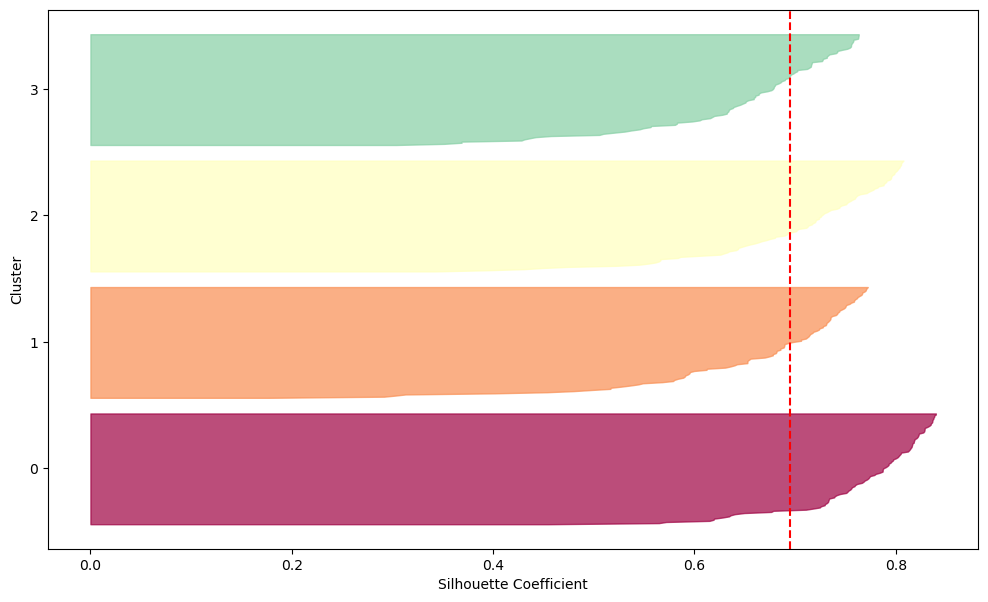

In [30]:
# number of clusters 
k = 4 
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
plot_silhouette_diagram(kmeans,X)

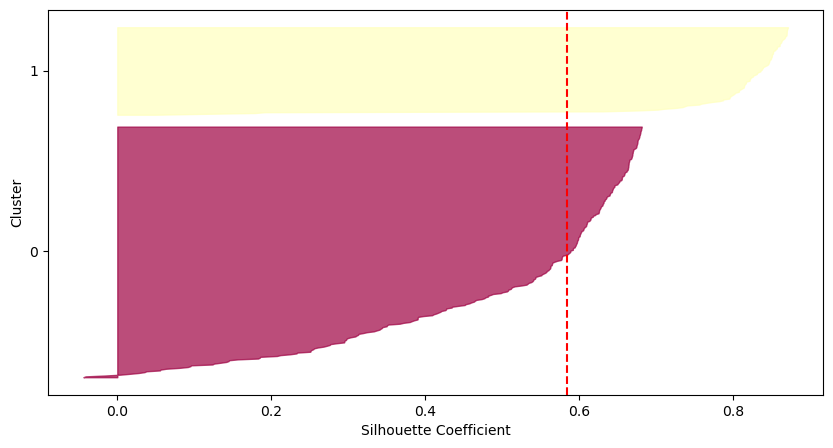

In [32]:
k = 2 
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
plot_silhouette_diagram(kmeans,X)

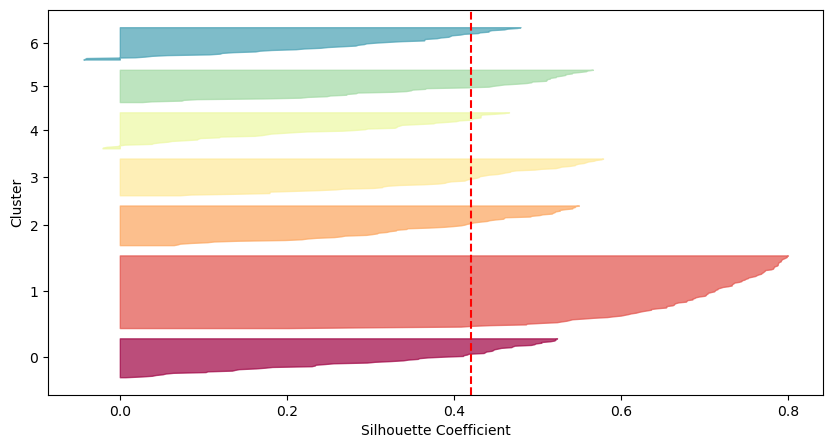

In [33]:
k = 7 
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
plot_silhouette_diagram(kmeans,X)

- k = 4 has the best silhouette score
- you want each to be close to the mean value